### Importing the required dictionaries

In [1]:
# import all the required libraries 
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
leads = pd.read_csv('Leads.csv')

In [3]:
leads.shape

(9240, 37)

In [4]:
100*(leads.isnull().sum()/leads.shape[0])

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

### Data Imputation & Missing value treatment

In [5]:
leads['Lead Quality'].value_counts()

Lead Quality
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: count, dtype: int64

In [6]:
missing_values = 100*leads.isnull().mean()
missing_values = missing_values[missing_values>=50].sort_values(ascending=False)
missing_values

Lead Quality    51.590909
dtype: float64

In [7]:
leads['Lead Quality'].fillna('unknown', inplace=True)


In [8]:
# replacing the null values with 'low', as they are similar to the low score
leads['Asymmetrique Activity Index'].fillna('low', inplace=True)

In [9]:
leads['Asymmetrique Activity Index'] = leads['Asymmetrique Activity Index'].apply(lambda x: 1 if x== '01.High' else 2 if x == '02.Medium' else 3 )


In [10]:
leads['Asymmetrique Activity Index'].value_counts()

Asymmetrique Activity Index
3    4580
2    3839
1     821
Name: count, dtype: int64

In [11]:
# Dropping the rest of the similar columns as they do not add extra value
leads = leads.drop(['Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1)


In [12]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 34 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [13]:
leads['Country'].fillna('unknown', inplace =True)

In [14]:
leads['Specialization'].fillna('unknown', inplace =True)
leads['Specialization'] = leads['Specialization'].apply(lambda x: 'unknown' if x == 'Select' else x)
leads['Specialization'].value_counts()

Specialization
unknown                              3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [15]:
leads['How did you hear about X Education'].fillna('unknown', inplace =True)
leads['How did you hear about X Education'] = leads['How did you hear about X Education'].apply(lambda x: 'unknown' if x == 'Select' else x)
leads['How did you hear about X Education'].value_counts()

How did you hear about X Education
unknown                  7250
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64

In [16]:
leads['What is your current occupation'].fillna('Unknown', inplace=True)
leads['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5600
Unknown                 2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [17]:
leads['What matters most to you in choosing a course'].fillna('Other', inplace=True)
leads['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Other                        2710
Flexibility & Convenience       2
Name: count, dtype: int64

In [18]:
## Rechecking the missing value %
100*(leads.isnull().sum()/leads.shape[0])

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                           0.000000
Specialization                                    0.000000
How did you hear about X Education                0.000000
What is your current occupation                   0.000000
What matters most to you in choosing a course     0.000000
Search                                            0.0000

In [19]:
leads['Lead Profile'] = leads['Lead Profile'].apply(lambda x: 'Other Leads' if x == 'Select' else x)
leads['Lead Profile'].fillna('Other Leads', inplace=True)
leads['Lead Profile'].value_counts()

Lead Profile
Other Leads                    7342
Potential Lead                 1613
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

In [20]:
leads['City'] = leads['City'].apply(lambda x: 'Other Cities' if x == 'Select' else x)
leads['City'].fillna('Other Cities', inplace=True)
leads['City'].value_counts()

City
Other Cities                   4355
Mumbai                         3222
Thane & Outskirts               752
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [21]:
leads['Tags'].fillna('unknown', inplace=True)

In [22]:
100*(leads.isnull().sum()/leads.shape[0])

Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.389610
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      1.482684
Total Time Spent on Website                      0.000000
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Country                                          0.000000
Specialization                                   0.000000
How did you hear about X Education               0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Magazine      

In [23]:
leads.dropna(axis=0, inplace=True)

In [24]:
100*(leads.isnull().sum()/leads.shape[0])

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
How did you hear about X Education               0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                             

In [25]:
# Get all the object columns
objectcols = leads.loc[: ,leads.dtypes=='object']
objectcols.columns
object_columns = list(objectcols) 
print(object_columns)

['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Lead Quality', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'Lead Profile', 'City', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


# EDA

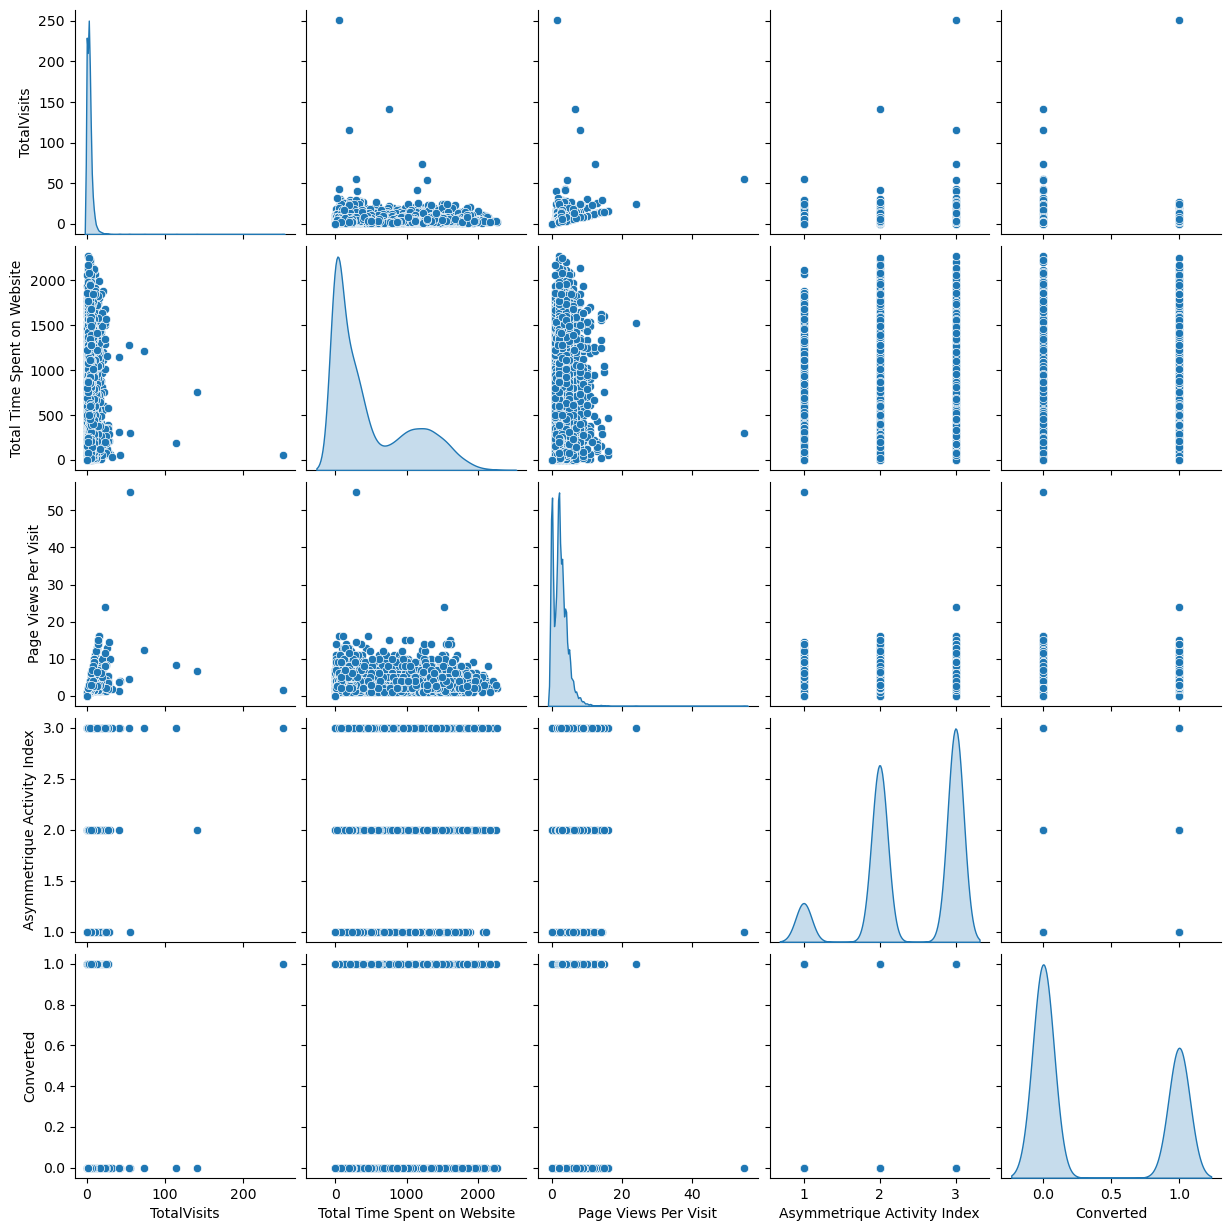

In [26]:
# Creating a new dataframe of only numerical variables

num_vars = leads[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Asymmetrique Activity Index', 'Converted']]

sns.pairplot(num_vars, diag_kind='kde')
plt.show()

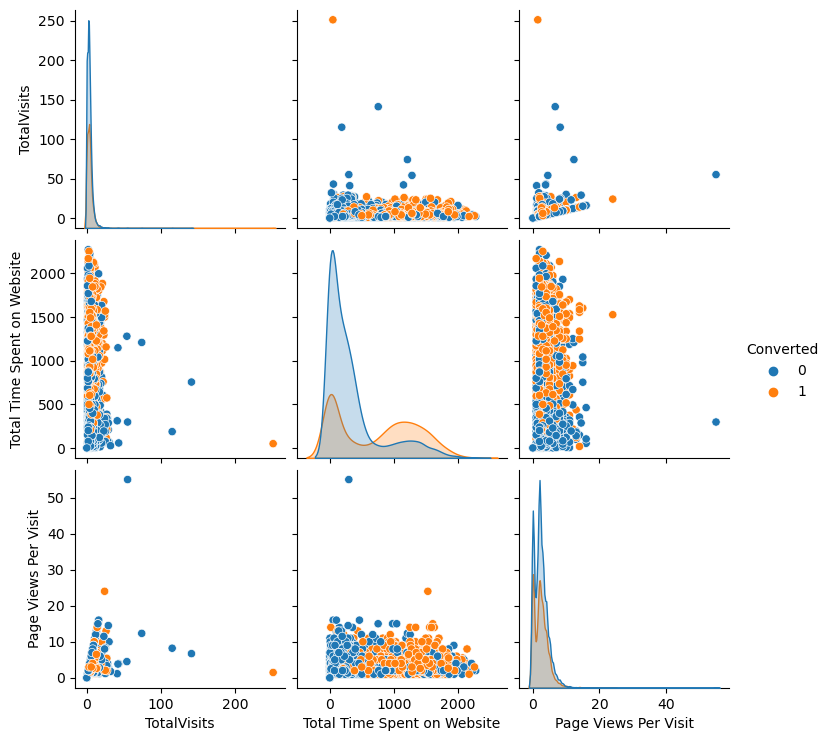

In [27]:
# Taking the numerical variables from the df to perform EDA

xedu = leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']]
sns.pairplot(xedu,diag_kind='kde',hue='Converted')
plt.show()

In [28]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
transformedxedu = pd.DataFrame(pt.fit_transform(xedu))
transformedxedu.columns = xedu.columns
transformedxedu.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Converted
0,-1.463971,-1.470706,-1.460532,-0.780481
1,0.744325,0.737618,0.303661,-0.780481
2,-0.147225,1.312200,0.060166,1.281261
3,-0.646554,0.273739,-0.543170,-0.780481
4,-0.147225,1.258818,-0.543170,1.281261


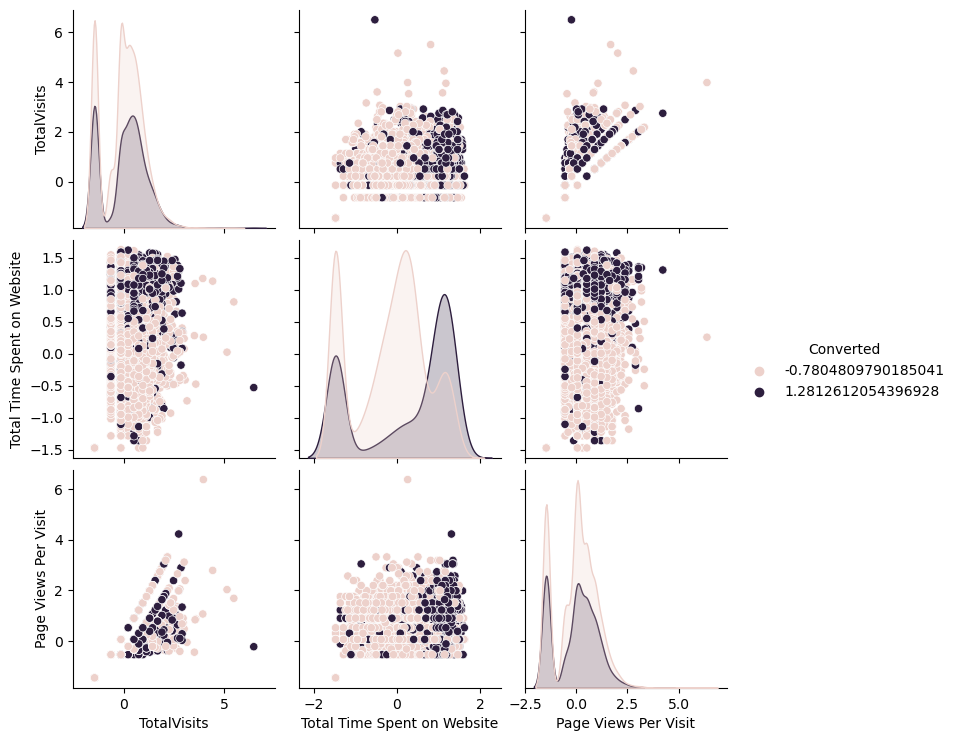

In [29]:
sns.pairplot(transformedxedu,diag_kind='kde',hue='Converted')
plt.show()

(array([0, 1, 2, 3]),
 [Text(0, 0, 'API'),
  Text(1, 0, 'Landing Page Submission'),
  Text(2, 0, 'Lead Add Form'),
  Text(3, 0, 'Lead Import')])

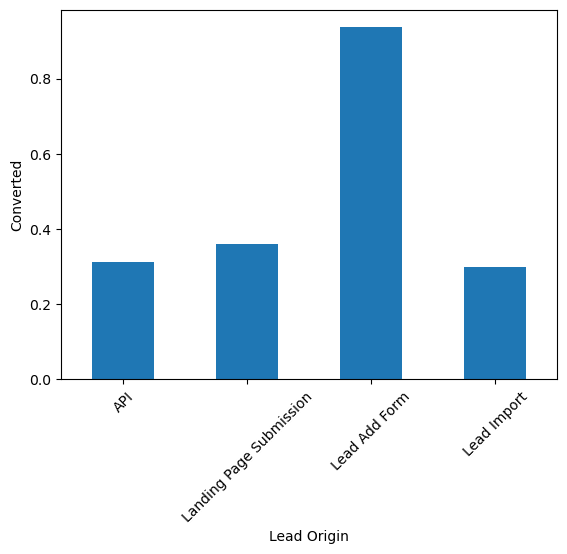

In [30]:

leads.groupby('Lead Origin')['Converted'].mean().plot.bar()
plt.xlabel('Lead Origin')
plt.ylabel('Converted')
plt.xticks(rotation=45)

Text(0, 0.5, 'Converted')

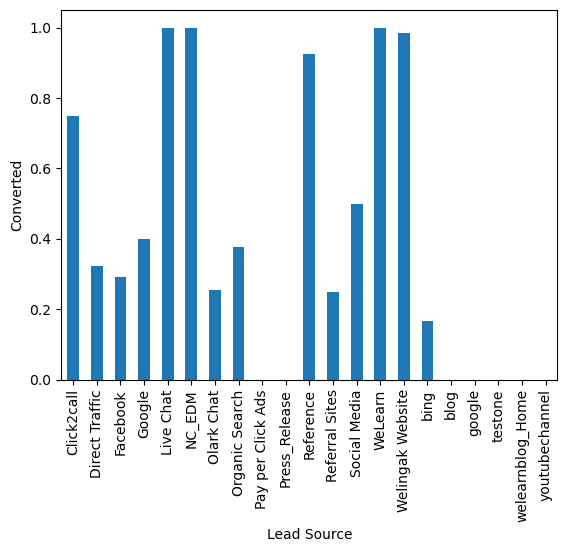

In [31]:
leads.groupby('Lead Source')['Converted'].mean().plot.bar()
plt.xlabel('Lead Source')
plt.ylabel('Converted')

Text(0, 0.5, 'Converted')

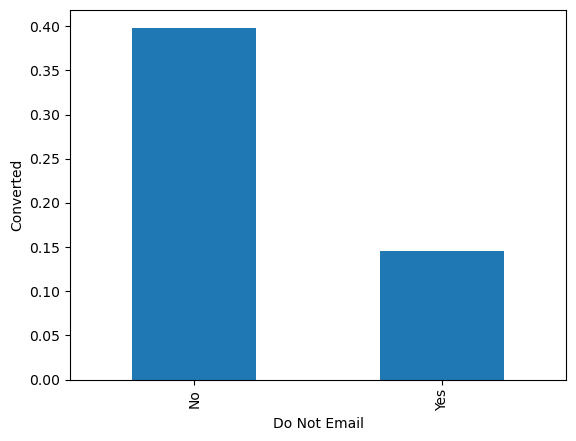

In [32]:
leads.groupby('Do Not Email')['Converted'].mean().plot.bar()
plt.xlabel('Do Not Email')
plt.ylabel('Converted')

Text(0, 0.5, 'Converted')

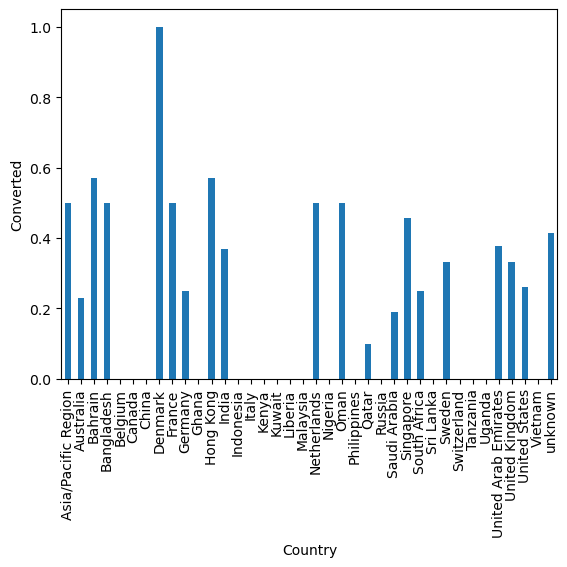

In [33]:
leads.groupby('Country')['Converted'].mean().plot.bar()
plt.xlabel('Country')
plt.ylabel('Converted')

Text(0, 0.5, 'Converted')

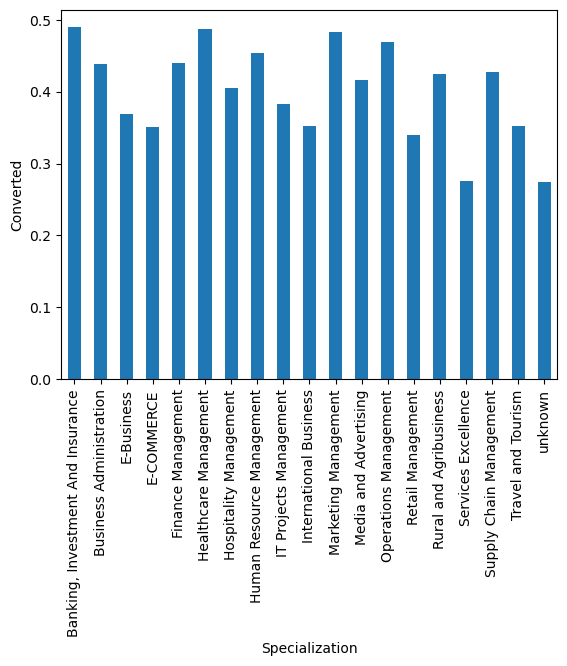

In [34]:
leads.groupby('Specialization')['Converted'].mean().plot.bar()
plt.xlabel('Specialization')
plt.ylabel('Converted')

Text(0, 0.5, 'Converted')

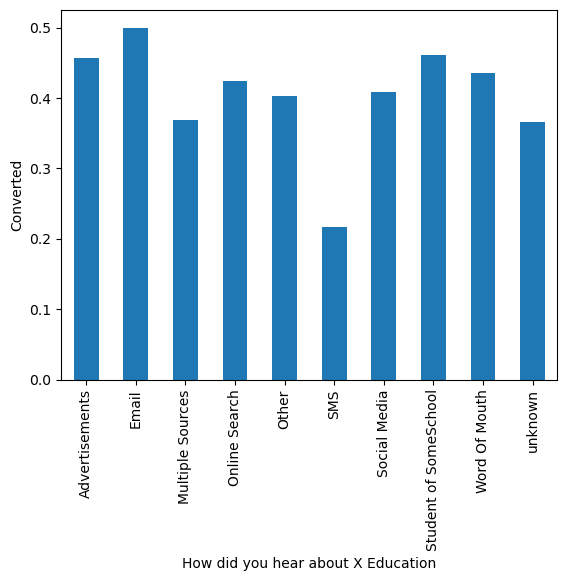

In [35]:
leads.groupby('How did you hear about X Education')['Converted'].mean().plot.bar()
plt.xlabel('How did you hear about X Education')
plt.ylabel('Converted')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Businessman'),
  Text(1, 0, 'Housewife'),
  Text(2, 0, 'Other'),
  Text(3, 0, 'Student'),
  Text(4, 0, 'Unemployed'),
  Text(5, 0, 'Unknown'),
  Text(6, 0, 'Working Professional')])

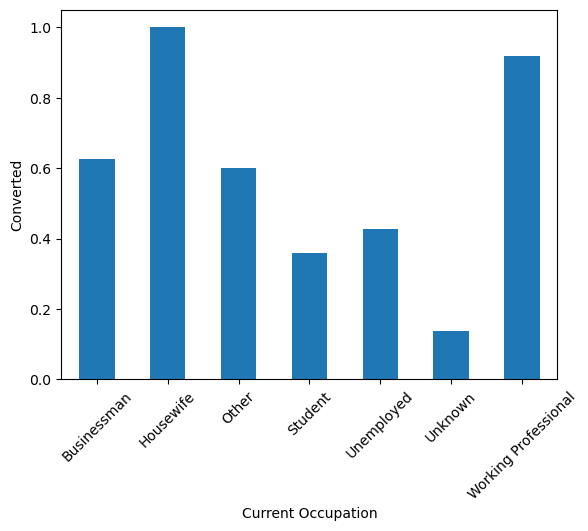

In [36]:
leads.groupby('What is your current occupation')['Converted'].mean().plot.bar()
plt.xlabel('Current Occupation')
plt.ylabel('Converted')
plt.xticks(rotation=45)

<Axes: xlabel='Digital Advertisement', ylabel='Converted'>

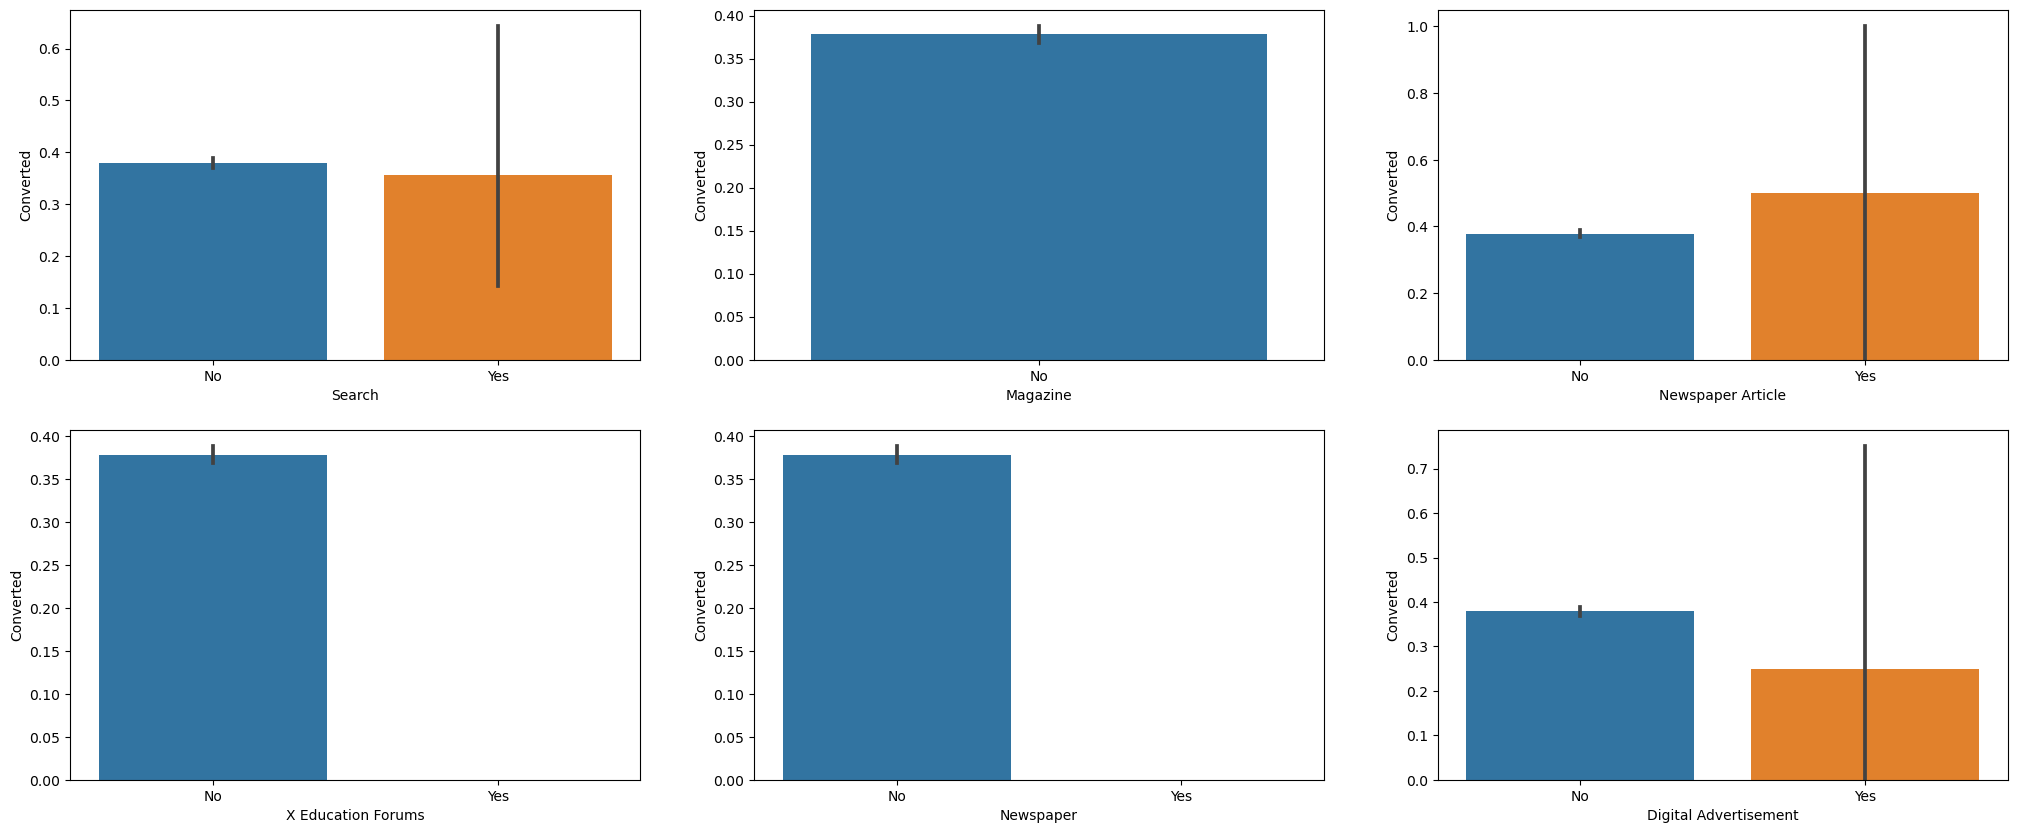

In [37]:
plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.barplot(x = 'Search', y = 'Converted', data = leads)
plt.subplot(2,3,2)
sns.barplot(x = 'Magazine', y = 'Converted', data = leads)
plt.subplot(2,3,3)
sns.barplot(x = 'Newspaper Article', y = 'Converted', data = leads)
plt.subplot(2,3,4)
sns.barplot(x = 'X Education Forums', y = 'Converted', data = leads)
plt.subplot(2,3,5)
sns.barplot(x = 'Newspaper', y = 'Converted', data = leads)
plt.subplot(2,3,6)
sns.barplot(x = 'Digital Advertisement', y = 'Converted', data = leads)

Text(0, 0.5, 'Converted')

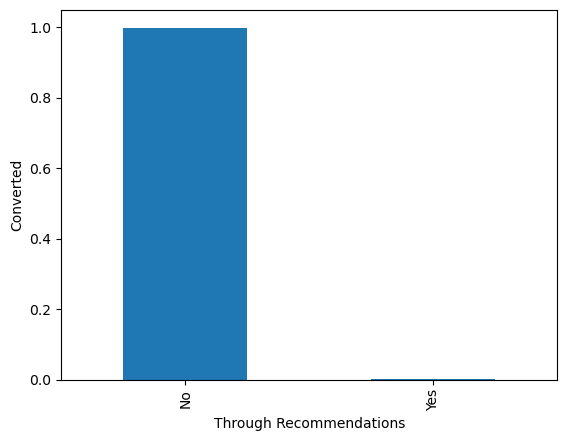

In [38]:
leads['Through Recommendations'].value_counts(normalize=True).plot.bar()
plt.xlabel('Through Recommendations')
plt.ylabel('Converted')

Text(0, 0.5, 'Converted')

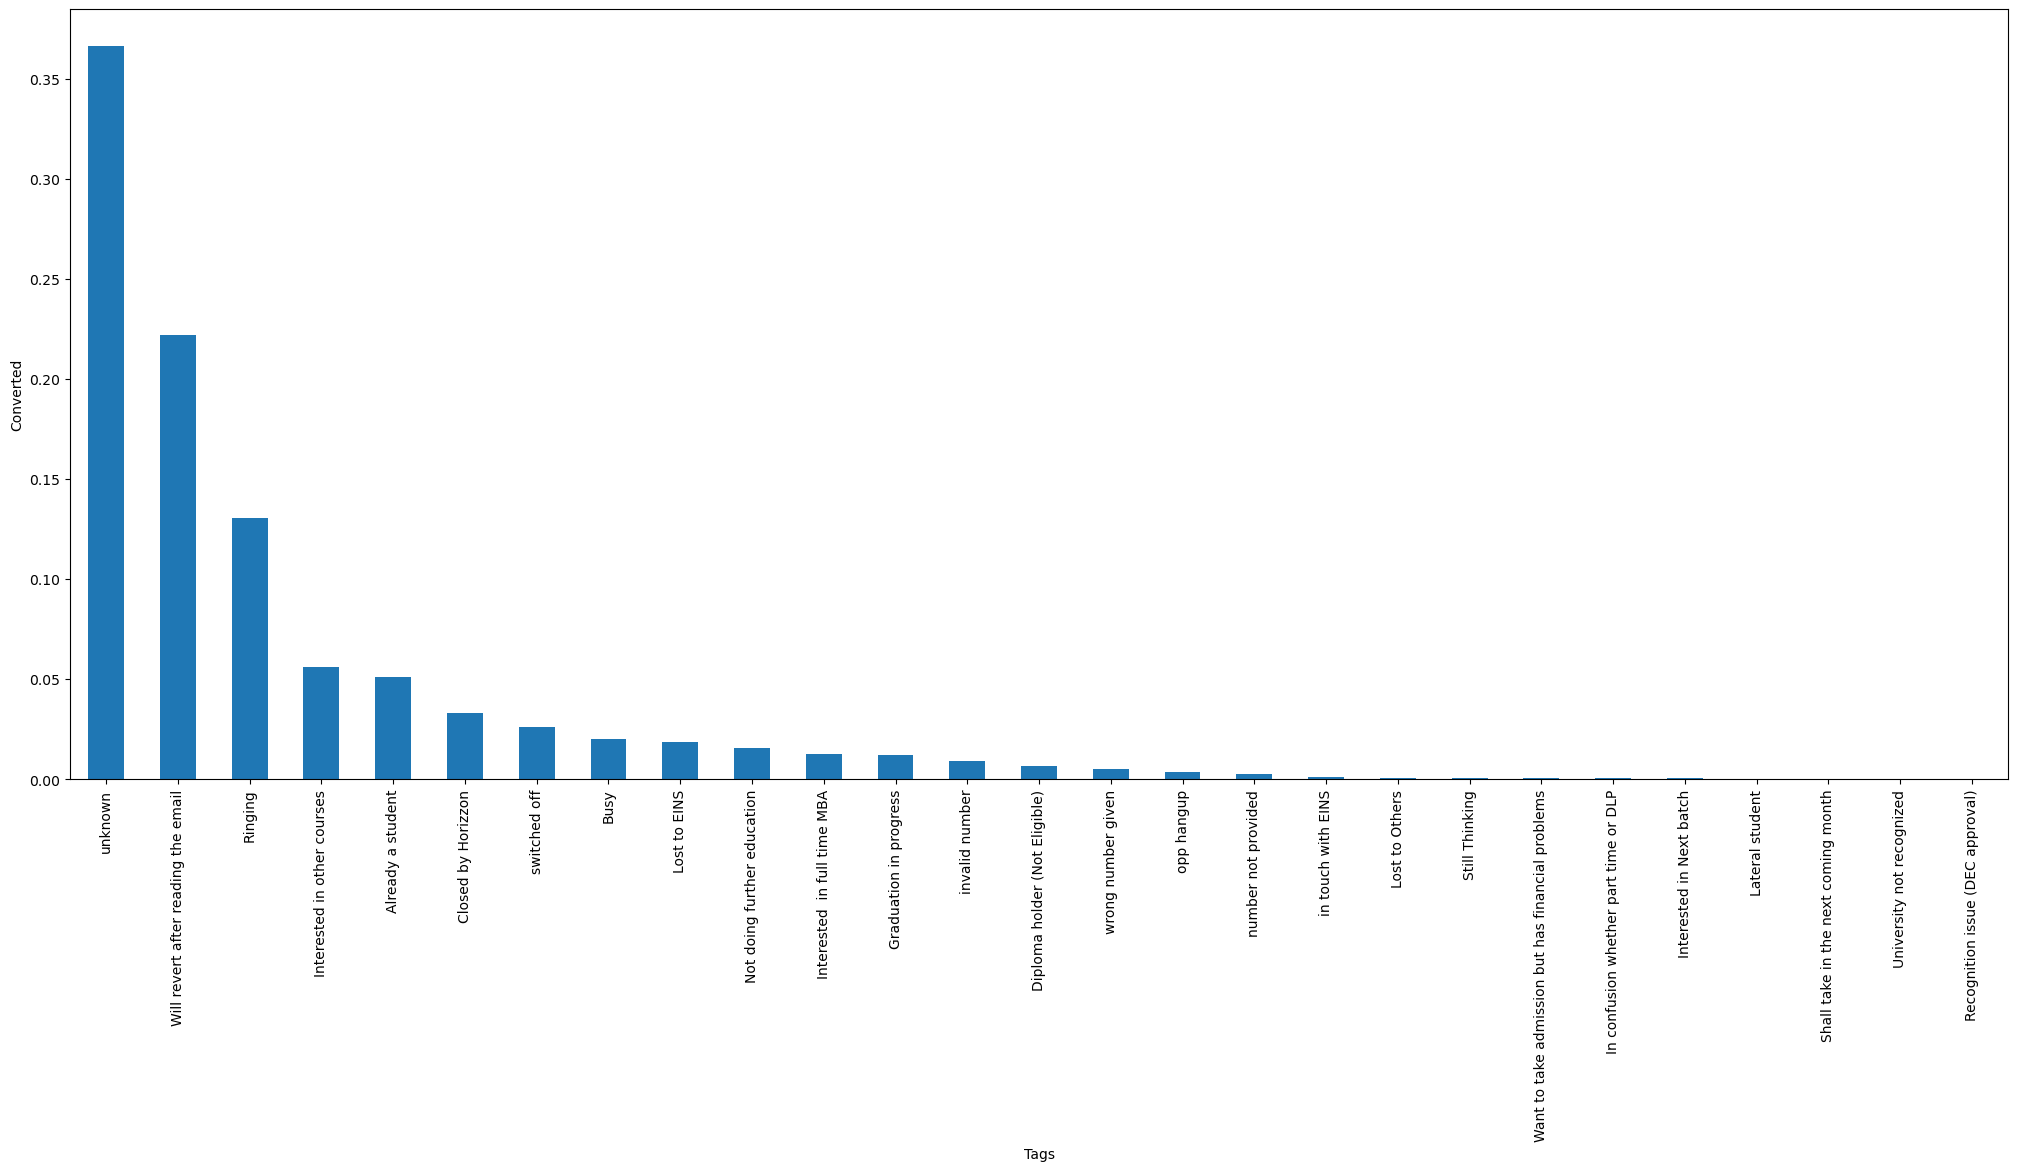

In [39]:
plt.figure(figsize=(25,10))
leads['Tags'].value_counts(normalize=True).plot.bar()
plt.xlabel('Tags')
plt.ylabel('Converted')

Text(0, 0.5, 'Converted')

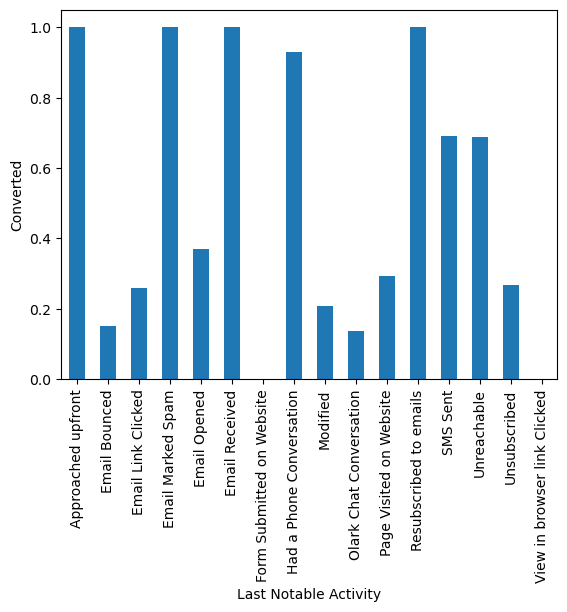

In [40]:
leads.groupby('Last Notable Activity')['Converted'].mean().plot.bar()
plt.xlabel('Last Notable Activity')
plt.ylabel('Converted')

### Converting all the categorical variables to int

In [41]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
for i in object_columns:
    leads[i]=label_encoder.fit_transform(leads[i])
leads.shape

(9074, 34)

In [42]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 34 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   int32  
 1   Lead Number                                    9074 non-null   int64  
 2   Lead Origin                                    9074 non-null   int32  
 3   Lead Source                                    9074 non-null   int32  
 4   Do Not Email                                   9074 non-null   int32  
 5   Do Not Call                                    9074 non-null   int32  
 6   Converted                                      9074 non-null   int64  
 7   TotalVisits                                    9074 non-null   float64
 8   Total Time Spent on Website                    9074 non-null   int64  
 9   Page Views Per Visit                           9074 non-n

In [43]:
# Dropping the prospect ID and Lead number columns as they do not add any value to the analysis

In [44]:
leads.drop(['Prospect ID', 'Lead Number'], axis = 1, inplace=True)

# Building a logistic regression model 

In [45]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
leads_train, leads_test = train_test_split(leads, train_size = 0.70, test_size = 0.30, random_state = 333)

In [46]:
# Now that we have split the scaling the Numerical columns to have a comparable data

from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()

scale_vars = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Lead Source', 'Lead Origin', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Tags', 'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Last Notable Activity']
leads_train[scale_vars] = Scaler.fit_transform(leads_train[scale_vars])

In [47]:
pd.set_option('display.max_columns', None)

In [48]:
# Lets check the scaled values on the dataframe

leads_train.describe()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.0,6351.0,6351.0,6351.0,6351.000000,6351.000000,6351.0,6351.000000,6351.000000,6351.0,6351.0,6351.000000,6351.000000,6351.000000,6351.0,6351.000000,6351.000000
mean,0.225476,0.209825,0.078885,0.000315,0.381515,0.013596,0.215415,0.098320,7.665564,0.496462,0.639129,0.891968,0.734950,0.292080,0.001260,0.0,0.0,0.0,0.0,0.000472,0.000315,0.0,0.671602,0.721430,0.0,0.0,0.555149,0.215683,0.702252,0.0,0.313966,0.509043
std,0.203300,0.150726,0.269581,0.017744,0.485797,0.018762,0.241777,0.087874,3.648355,0.309033,0.340746,0.238466,0.114785,0.454755,0.035472,0.0,0.0,0.0,0.0,0.021731,0.017744,0.0,0.310825,0.335067,0.0,0.0,0.122793,0.241504,0.324573,0.0,0.464139,0.212338
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.000000,0.050000,0.000000,0.000000,0.000000,0.003984,0.003551,0.041667,5.000000,0.305556,0.388889,1.000000,0.666667,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.538462,0.400000,0.0,0.0,0.500000,0.000000,0.500000,0.0,0.000000,0.266667
50%,0.333333,0.150000,0.000000,0.000000,0.000000,0.011952,0.110963,0.083333,7.000000,0.305556,0.666667,1.000000,0.666667,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.730769,1.000000,0.0,0.0,0.500000,0.200000,0.500000,0.0,0.000000,0.533333
75%,0.333333,0.300000,0.000000,0.000000,1.000000,0.019920,0.412339,0.125000,12.000000,1.000000,1.000000,1.000000,0.833333,1.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.961538,1.000000,0.0,0.0,0.500000,0.200000,1.000000,0.0,1.000000,0.666667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000,1.000000,0.0,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


In [49]:
leads_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6351 entries, 7635 to 8333
Data columns (total 32 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    6351 non-null   float64
 1   Lead Source                                    6351 non-null   float64
 2   Do Not Email                                   6351 non-null   int32  
 3   Do Not Call                                    6351 non-null   int32  
 4   Converted                                      6351 non-null   int64  
 5   TotalVisits                                    6351 non-null   float64
 6   Total Time Spent on Website                    6351 non-null   float64
 7   Page Views Per Visit                           6351 non-null   float64
 8   Last Activity                                  6351 non-null   int32  
 9   Country                                        6351 no

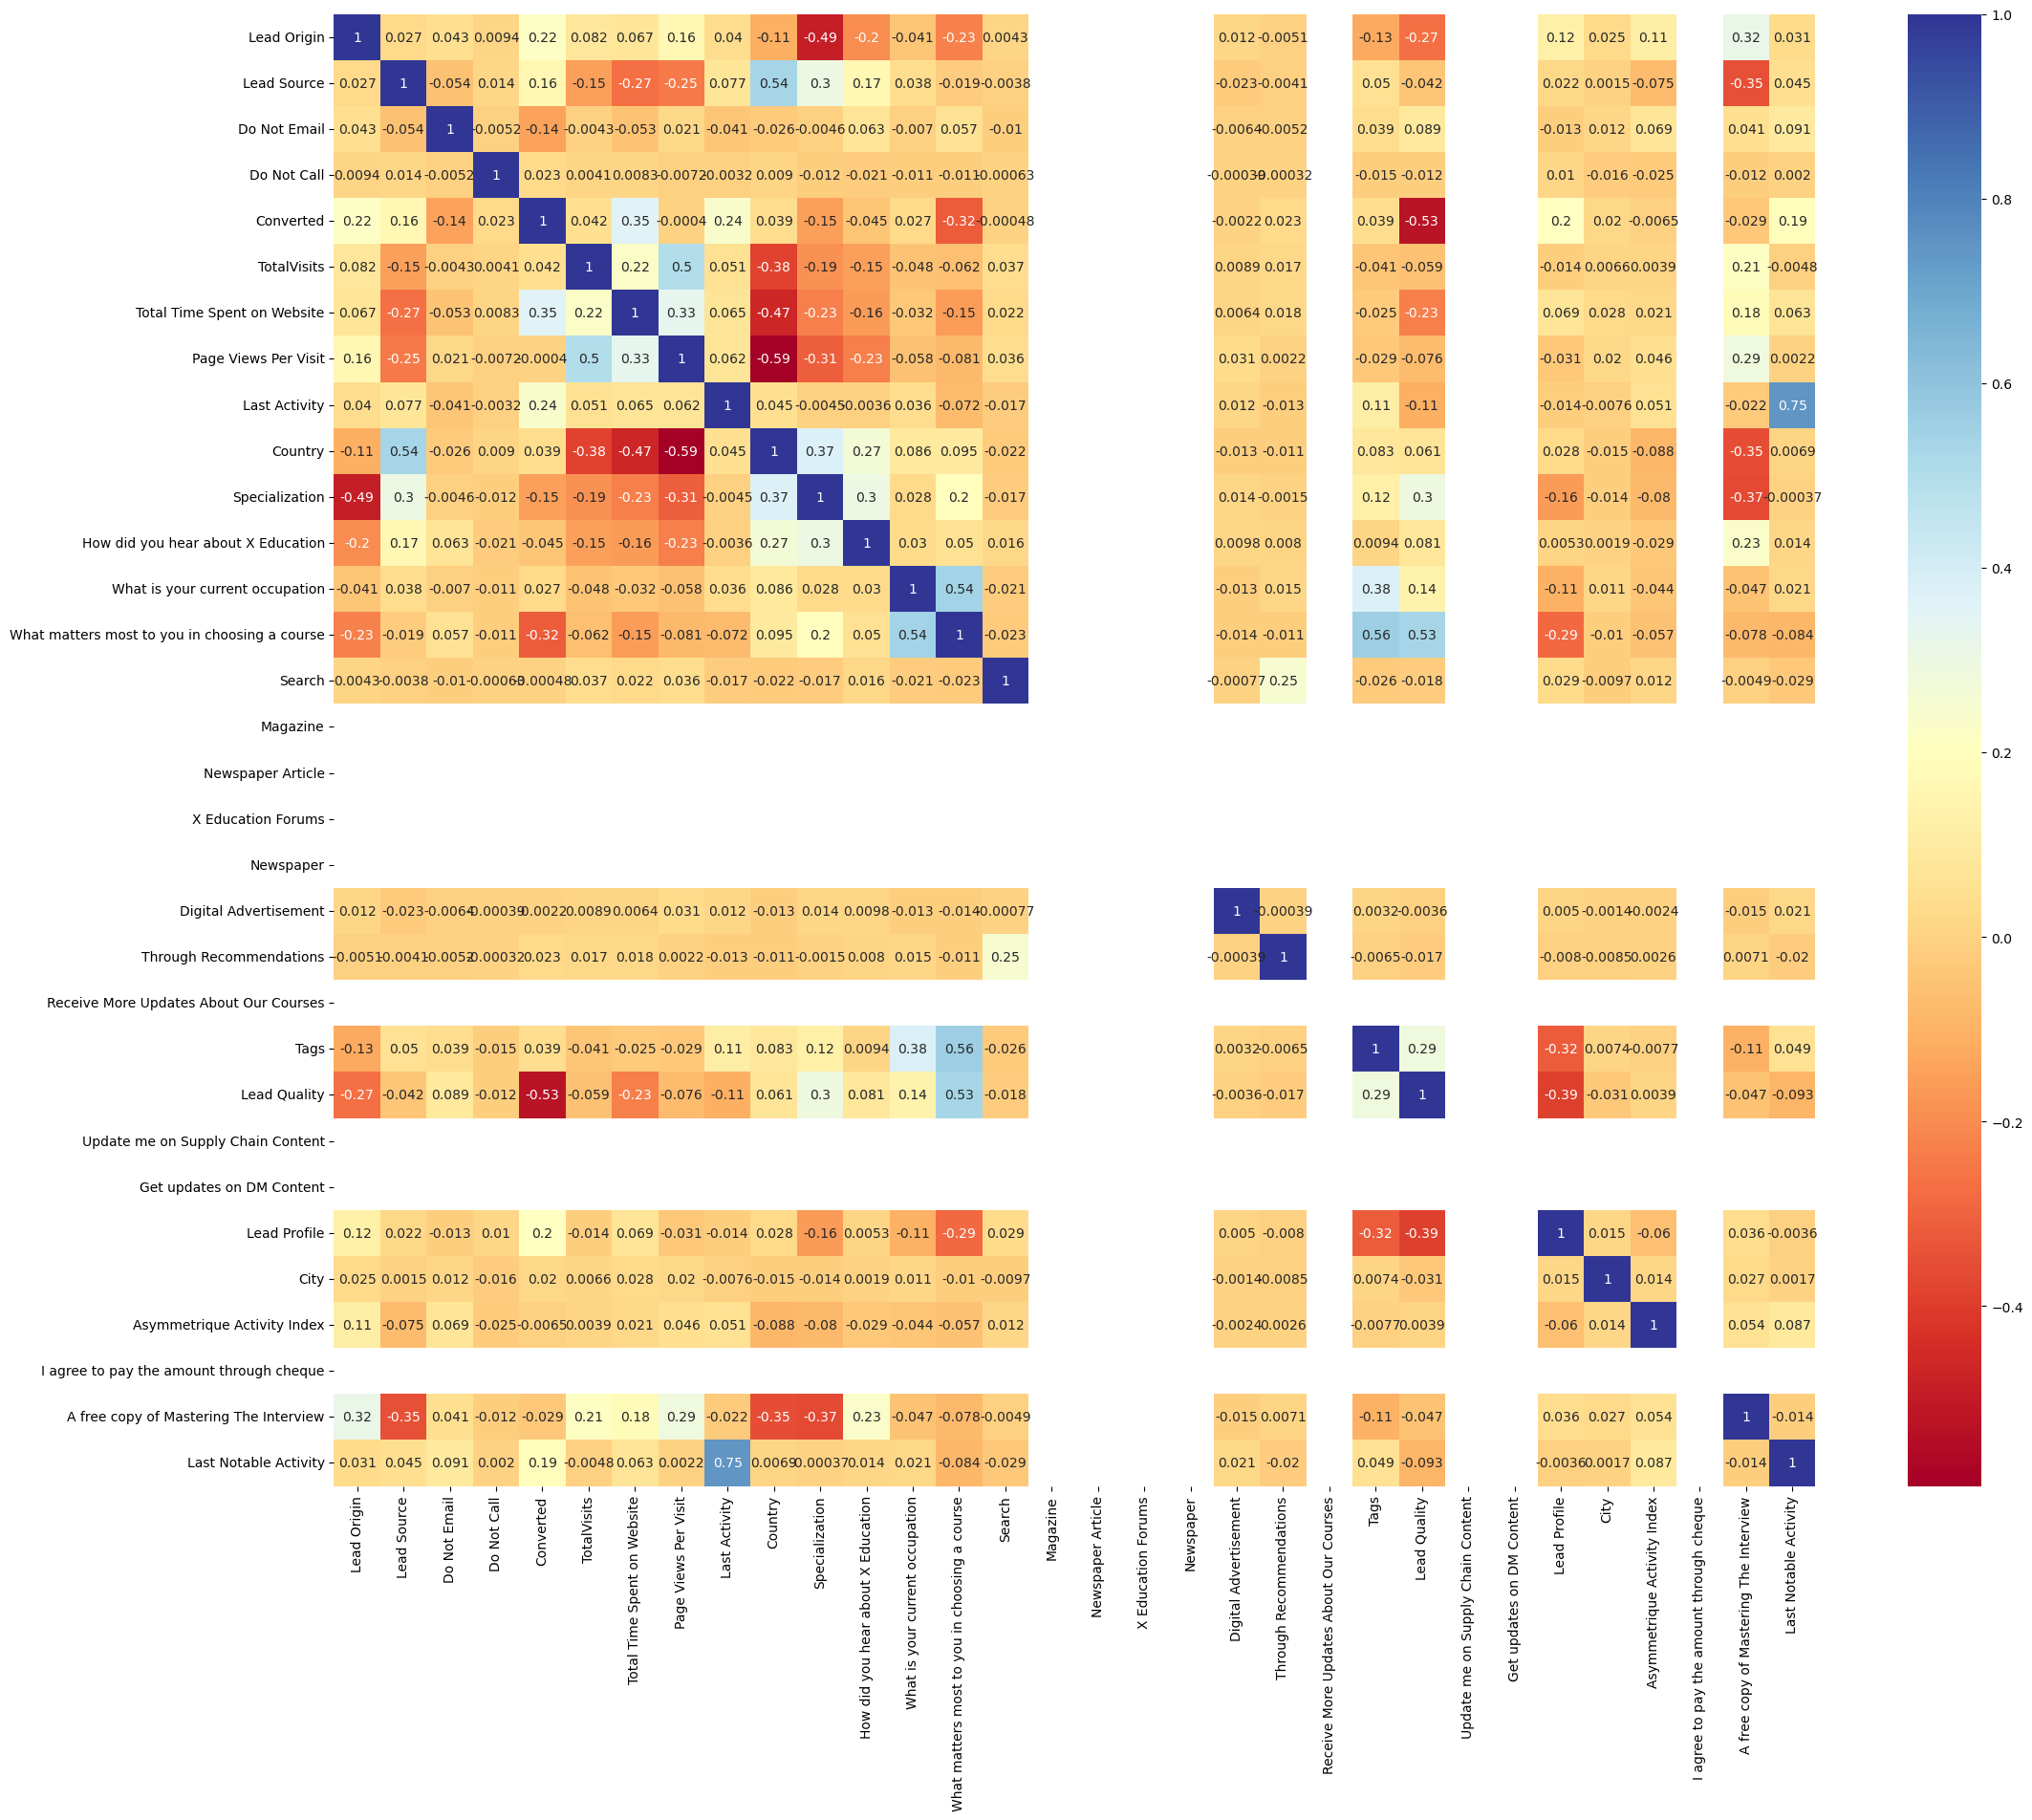

In [50]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,20))
sns.heatmap(leads_train.corr(), annot=True, cmap='RdYlBu')
plt.show()

In [51]:
y_train = leads_train.pop('Converted')
X_train = leads_train

In [52]:
X_train.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations        

# RFE 

In [53]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()


In [54]:
# Import RFE
from sklearn.feature_selection import RFE

In [55]:
# Running RFE with 15 variables as output
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [56]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Origin', True, 1),
 ('Lead Source', True, 1),
 ('Do Not Email', True, 1),
 ('Do Not Call', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Last Activity', False, 8),
 ('Country', True, 1),
 ('Specialization', False, 6),
 ('How did you hear about X Education', False, 5),
 ('What is your current occupation', True, 1),
 ('What matters most to you in choosing a course', True, 1),
 ('Search', False, 2),
 ('Magazine', False, 16),
 ('Newspaper Article', False, 17),
 ('X Education Forums', False, 15),
 ('Newspaper', False, 11),
 ('Digital Advertisement', False, 3),
 ('Through Recommendations', True, 1),
 ('Receive More Updates About Our Courses', False, 12),
 ('Tags', True, 1),
 ('Lead Quality', True, 1),
 ('Update me on Supply Chain Content', False, 10),
 ('Get updates on DM Content', False, 13),
 ('Lead Profile', True, 1),
 ('City', False, 9),
 ('Asymmetrique Activity Index', False, 7),
 ('I agree to pay the amoun

In [57]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

In [58]:
col

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Country', 'What is your current occupation',
       'What matters most to you in choosing a course',
       'Through Recommendations', 'Tags', 'Lead Quality', 'Lead Profile',
       'Last Notable Activity'],
      dtype='object')

In [59]:
# lets create a new dataframe for the selected variables
X_train_rfe = X_train[col]

In [60]:
# Columns that were rejected by RFE
X_train.columns[~rfe.support_]

Index(['Last Activity', 'Specialization', 'How did you hear about X Education',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'Asymmetrique Activity Index',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview'],
      dtype='object')

## Building a logistic regression model using statsmodel


### VIF Check

In [61]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,What is your current occupation,37.52
13,Lead Profile,18.58
11,Tags,8.69
7,Country,8.02
12,Lead Quality,7.00
14,Last Notable Activity,6.82
1,Lead Source,4.30
6,Page Views Per Visit,3.97
9,What matters most to you in choosing a course,2.95
0,Lead Origin,2.51


In [62]:
# Any variable that has a VIF > 5 should be dropped.
# Lets also build a LR model to find the P values and drop the variables accordingly

In [63]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train_rfe)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2363.3
Date:                Mon, 29 Jul 2024   Deviance:                       4726.6
Time:                        02:48:22   Pearson chi2:                 7.50e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4431
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -6.5993      0.462    -14.299      0.000      -7.504      -5.695
Lead Origin                                       1.4314      0.195      7.337      0.000       1.049       1.814
Lead Source                                       2.7865      0.290      9.625      0.000       2.219       3.354
Do Not Email                                     -1.4982      0.173     -8.661      0.000      -1.837      -1.159
Do Not Call                                      20.4182   2.03e+04      0.001      0.999   -3.98e+04    3.99e+04
TotalVisits                                      11.9676      3.552      3.369      0.001       5.006      18.930
Total Time Spent on Website                       4.5860      0.184     24.989      0.000       4.226       4.946
Page Views Per Visit                             -3.4254      0.624     -5.486      0.000      -4.649      -2.202
Country                                           1.5944      0.183      8.736      0.000       1.237       1.952
What is your current occupation                   3.8461      0.469      8.192      0.000       2.926       4.766
What matters most to you in choosing a course    -1.7888      0.131    -13.616      0.000      -2.046      -1.531
Through Recommendations                          20.9517   1.68e+04      0.001      0.999   -3.29e+04     3.3e+04
Tags                                              2.8205      0.154     18.345      0.000       2.519       3.122
Lead Quality                                     -3.3199      0.145    -22.822      0.000      -3.605      -3.035
Lead Profile                                      1.3788      0.364      3.783      0.000       0.665       2.093
Last Notable Activity                             1.7980      0.175     10.290      0.000       1.456       2.141
=================================================================================================================
"""

In [64]:
# Dropping the 'What is your current occupation', as it has high VIF value
X_train_rfe.drop('What is your current occupation', axis=1, inplace=True)

# Need to drop columns with High VIF and Pvalues from the X_train_rfe df

## Model 2

In [65]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train_rfe)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2402.2
Date:                Mon, 29 Jul 2024   Deviance:                       4804.4
Time:                        02:48:22   Pearson chi2:                 7.60e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4362
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.9658      0.315    -12.594      0.000      -4.583      -3.349
Lead Origin                                       1.4726      0.193      7.632      0.000       1.094       1.851
Lead Source                                       2.7755      0.287      9.659      0.000       2.212       3.339
Do Not Email                                     -1.5197      0.170     -8.937      0.000      -1.853      -1.186
Do Not Call                                      20.3319   2.04e+04      0.001      0.999   -3.99e+04       4e+04
TotalVisits                                      11.5051      3.548      3.243      0.001       4.551      18.459
Total Time Spent on Website                       4.6039      0.182     25.260      0.000       4.247       4.961
Page Views Per Visit                             -3.3664      0.619     -5.440      0.000      -4.579      -2.153
Country                                           1.6274      0.181      8.993      0.000       1.273       1.982
What matters most to you in choosing a course    -1.1799      0.108    -10.971      0.000      -1.391      -0.969
Through Recommendations                          21.9646   1.54e+04      0.001      0.999   -3.02e+04    3.02e+04
Tags                                              2.9250      0.153     19.162      0.000       2.626       3.224
Lead Quality                                     -3.5230      0.144    -24.382      0.000      -3.806      -3.240
Lead Profile                                      1.4114      0.348      4.051      0.000       0.728       2.094
Last Notable Activity                             1.8396      0.173     10.637      0.000       1.501       2.179
=================================================================================================================
"""

In [66]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Lead Profile,11.88
10,Tags,7.95
7,Country,7.67
11,Lead Quality,6.51
13,Last Notable Activity,6.46
1,Lead Source,4.29
6,Page Views Per Visit,3.88
8,What matters most to you in choosing a course,2.67
0,Lead Origin,2.43
5,Total Time Spent on Website,2.38


In [67]:
# Dropping the tags column as it has the highest VIF
X_train_rfe.drop('Lead Profile', axis=1, inplace=True)

## Model 3

In [68]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train_rfe)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2410.1
Date:                Mon, 29 Jul 2024   Deviance:                       4820.3
Time:                        02:48:23   Pearson chi2:                 7.44e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4348
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.0146      0.205    -14.686      0.000      -3.417      -2.612
Lead Origin                                       1.4757      0.192      7.687      0.000       1.099       1.852
Lead Source                                       2.7415      0.286      9.573      0.000       2.180       3.303
Do Not Email                                     -1.5207      0.170     -8.969      0.000      -1.853      -1.188
Do Not Call                                      20.4165   2.02e+04      0.001      0.999   -3.96e+04    3.96e+04
TotalVisits                                      11.7499      3.533      3.326      0.001       4.826      18.674
Total Time Spent on Website                       4.6171      0.182     25.355      0.000       4.260       4.974
Page Views Per Visit                             -3.4651      0.617     -5.616      0.000      -4.674      -2.256
Country                                           1.6545      0.181      9.159      0.000       1.300       2.009
What matters most to you in choosing a course    -1.1801      0.107    -10.983      0.000      -1.391      -0.970
Through Recommendations                          21.8232   1.55e+04      0.001      0.999   -3.03e+04    3.03e+04
Tags                                              2.8255      0.151     18.748      0.000       2.530       3.121
Lead Quality                                     -3.6643      0.141    -25.958      0.000      -3.941      -3.388
Last Notable Activity                             1.8093      0.172     10.508      0.000       1.472       2.147
=================================================================================================================
"""

In [69]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Tags,7.92
7,Country,6.34
11,Lead Quality,6.19
12,Last Notable Activity,5.93
1,Lead Source,4.29
6,Page Views Per Visit,3.67
8,What matters most to you in choosing a course,2.61
0,Lead Origin,2.30
5,Total Time Spent on Website,2.18
4,TotalVisits,2.04


In [70]:
# Dropping the 'Tags' column as it has high VIF
X_train_rfe.drop('Tags', axis=1, inplace=True)

## Model 4

In [71]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train_rfe)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2611.6
Date:                Mon, 29 Jul 2024   Deviance:                       5223.2
Time:                        02:48:23   Pearson chi2:                 6.56e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3978
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.7578      0.182     -9.659      0.000      -2.114      -1.401
Lead Origin                                       1.3741      0.182      7.564      0.000       1.018       1.730
Lead Source                                       2.8921      0.271     10.656      0.000       2.360       3.424
Do Not Email                                     -1.3955      0.162     -8.635      0.000      -1.712      -1.079
Do Not Call                                      19.9161   2.03e+04      0.001      0.999   -3.99e+04    3.99e+04
TotalVisits                                      10.4510      3.417      3.059      0.002       3.755      17.148
Total Time Spent on Website                       4.5579      0.174     26.259      0.000       4.218       4.898
Page Views Per Visit                             -2.8183      0.594     -4.742      0.000      -3.983      -1.654
Country                                           1.6997      0.173      9.811      0.000       1.360       2.039
What matters most to you in choosing a course    -0.2851      0.098     -2.900      0.004      -0.478      -0.092
Through Recommendations                          21.5446   1.62e+04      0.001      0.999   -3.18e+04    3.18e+04
Lead Quality                                     -3.3532      0.132    -25.446      0.000      -3.612      -3.095
Last Notable Activity                             2.0725      0.165     12.529      0.000       1.748       2.397
=================================================================================================================
"""

In [72]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Country,6.05
10,Lead Quality,5.97
11,Last Notable Activity,5.58
1,Lead Source,4.26
6,Page Views Per Visit,3.60
0,Lead Origin,2.28
5,Total Time Spent on Website,2.08
4,TotalVisits,2.04
8,What matters most to you in choosing a course,2.00
2,Do Not Email,1.12


In [73]:
# Dropping the 'Country' column as it has high pvalue
X_train_rfe.drop('Country', axis=1, inplace=True)

## Model 5

In [74]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train_rfe)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2660.4
Date:                Mon, 29 Jul 2024   Deviance:                       5320.8
Time:                        02:48:23   Pearson chi2:                 6.53e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3885
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.7431      0.148     -5.020      0.000      -1.033      -0.453
Lead Origin                                       1.2599      0.179      7.045      0.000       0.909       1.610
Lead Source                                       3.9792      0.245     16.247      0.000       3.499       4.459
Do Not Email                                     -1.3792      0.159     -8.650      0.000      -1.692      -1.067
Do Not Call                                      20.0846   2.04e+04      0.001      0.999      -4e+04       4e+04
TotalVisits                                       5.1061      3.098      1.648      0.099      -0.967      11.179
Total Time Spent on Website                       4.0261      0.160     25.111      0.000       3.712       4.340
Page Views Per Visit                             -4.8220      0.556     -8.666      0.000      -5.913      -3.731
What matters most to you in choosing a course    -0.2387      0.098     -2.441      0.015      -0.430      -0.047
Through Recommendations                          21.4101   1.64e+04      0.001      0.999   -3.21e+04    3.21e+04
Lead Quality                                     -3.3220      0.130    -25.618      0.000      -3.576      -3.068
Last Notable Activity                             2.0394      0.163     12.489      0.000       1.719       2.359
=================================================================================================================
"""

In [75]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Lead Quality,5.32
10,Last Notable Activity,5.03
6,Page Views Per Visit,3.26
1,Lead Source,2.75
0,Lead Origin,2.25
5,Total Time Spent on Website,2.05
4,TotalVisits,2.03
7,What matters most to you in choosing a course,2.00
2,Do Not Email,1.12
3,Do Not Call,1.00


In [76]:
# Dropping the 'Lead Quality' column as it has high VIF 
X_train_rfe.drop('Lead Quality', axis=1, inplace=True)

## Model 6

In [77]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train_rfe)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6340
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3060.2
Date:                Mon, 29 Jul 2024   Deviance:                       6120.5
Time:                        02:48:24   Pearson chi2:                 6.38e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3064
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.9144      0.121    -24.112      0.000      -3.151      -2.677
Lead Origin                                       1.8687      0.161     11.642      0.000       1.554       2.183
Lead Source                                       3.8165      0.230     16.575      0.000       3.365       4.268
Do Not Email                                     -1.5419      0.151    -10.241      0.000      -1.837      -1.247
Do Not Call                                      20.3579   2.06e+04      0.001      0.999   -4.04e+04    4.05e+04
TotalVisits                                       4.8101      2.813      1.710      0.087      -0.704      10.324
Total Time Spent on Website                       4.2005      0.150     28.038      0.000       3.907       4.494
Page Views Per Visit                             -4.2838      0.505     -8.488      0.000      -5.273      -3.295
What matters most to you in choosing a course    -1.5046      0.083    -18.103      0.000      -1.668      -1.342
Through Recommendations                          21.9551   1.59e+04      0.001      0.999   -3.12e+04    3.12e+04
Last Notable Activity                             1.9880      0.149     13.312      0.000       1.695       2.281
=================================================================================================================
"""

In [78]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Last Notable Activity,4.20
6,Page Views Per Visit,3.17
1,Lead Source,2.57
0,Lead Origin,2.24
5,Total Time Spent on Website,2.05
4,TotalVisits,2.03
7,What matters most to you in choosing a course,1.35
2,Do Not Email,1.11
3,Do Not Call,1.00
8,Through Recommendations,1.00


In [79]:
#Dropping the 'Do not call' & 'Through Recommendations' columns as they have high p-value
X_train_rfe.drop(['Do Not Call', 'Through Recommendations'], axis=1, inplace=True)

## Model 7

In [80]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train_rfe)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6342
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3062.7
Date:                Mon, 29 Jul 2024   Deviance:                       6125.3
Time:                        02:48:24   Pearson chi2:                 6.38e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3059
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.9096      0.121    -24.087      0.000      -3.146      -2.673
Lead Origin                                       1.8706      0.160     11.662      0.000       1.556       2.185
Lead Source                                       3.8127      0.230     16.569      0.000       3.362       4.264
Do Not Email                                     -1.5428      0.151    -10.249      0.000      -1.838      -1.248
TotalVisits                                       4.9026      2.831      1.732      0.083      -0.645      10.451
Total Time Spent on Website                       4.1995      0.150     28.053      0.000       3.906       4.493
Page Views Per Visit                             -4.2964      0.506     -8.496      0.000      -5.287      -3.305
What matters most to you in choosing a course    -1.5062      0.083    -18.124      0.000      -1.669      -1.343
Last Notable Activity                             1.9832      0.149     13.284      0.000       1.691       2.276
=================================================================================================================
"""

In [81]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Notable Activity,4.20
5,Page Views Per Visit,3.17
1,Lead Source,2.57
0,Lead Origin,2.24
4,Total Time Spent on Website,2.05
3,TotalVisits,2.03
6,What matters most to you in choosing a course,1.35
2,Do Not Email,1.11


## Model Evaluation

In [82]:
# Now that we have decent p-values and VIF for all the variables, lets go ahead and make predictions using the final set of features


In [83]:
# Predicting the probabilities on the train set using the final model

y_train_pred = res.predict(sm.add_constant(X_train_rfe))
y_train_pred[:10]

7635    0.109393
7276    0.088658
8724    0.707150
8314    0.802095
5033    0.699469
829     0.425937
3472    0.033587
8464    0.590824
2469    0.152889
7801    0.358073
dtype: float64

In [84]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.109393  , 0.08865751, 0.70715048, 0.80209526, 0.69946859,
       0.42593692, 0.03358685, 0.59082441, 0.15288906, 0.35807323])

In [85]:
# Creating a dataframe that contains the actual conversion rate and the probabilites predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head(10)

,Converted,Conversion_Prob
0,0,0.109393
1,0,0.088658
2,0,0.707150
3,1,0.802095
4,0,0.699469
5,1,0.425937
6,0,0.033587
7,0,0.590824
8,0,0.152889
9,0,0.358073


In [86]:
# Substituting values above 0.5 as 1 
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head(10)

,Converted,Conversion_Prob,Predicted
0,0,0.109393,0
1,0,0.088658,0
2,0,0.707150,1
3,1,0.802095,1
4,0,0.699469,1
5,1,0.425937,0
6,0,0.033587,0
7,0,0.590824,1
8,0,0.152889,0
9,0,0.358073,0


# Model evaluation

In [87]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [88]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['Predicted'])
confusion

array([[3411,  517],
       [ 921, 1502]], dtype=int64)

In [89]:
# Predicted      Not churn   Churn
# Actual
# Not churn         3411      517
# Churn              729     1727

In [90]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['Predicted'])

0.7735789639426862

In [91]:
# The accuracy is around 77%, which is a fairly good number

In [92]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [93]:
# Calculating the sensitivity
TP/(TP+FN)

0.6198926950061907

In [94]:
# Calculating the specificity
TN/(TN+FP)

0.8683808553971487

<h4 style = "color : Green"> With the current cut off of 0.5 VIF and 77% Accuracy. The sensitivity stands at 62% and specificity metric at 87%

## Finding the optimal Cutoff

In [95]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [96]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

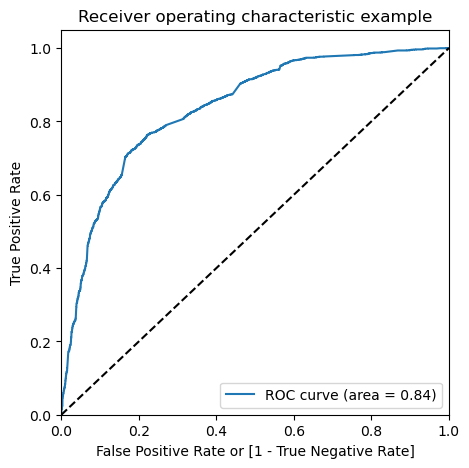

In [97]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

<h4 style = "color : Green"> The area under the ROC curve is 0.84 which is a good value

In [98]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.109393,0,1,1,0,0,0,0,0,0,0,0
1,0,0.088658,0,1,0,0,0,0,0,0,0,0,0
2,0,0.707150,1,1,1,1,1,1,1,1,1,0,0
3,1,0.802095,1,1,1,1,1,1,1,1,1,1,0
4,0,0.699469,1,1,1,1,1,1,1,1,0,0,0


In [99]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.381515,1.000000,0.000000
0.1,0.1,0.573768,0.976475,0.325356
0.2,0.2,0.662415,0.916220,0.505855
0.3,0.3,0.721304,0.829137,0.654786
0.4,0.4,0.776098,0.736690,0.800407
0.5,0.5,0.773579,0.619893,0.868381
0.6,0.6,0.765234,0.532811,0.908605
0.7,0.7,0.734687,0.405283,0.937882
0.8,0.8,0.694536,0.252992,0.966904
0.9,0.9,0.640214,0.068097,0.993126


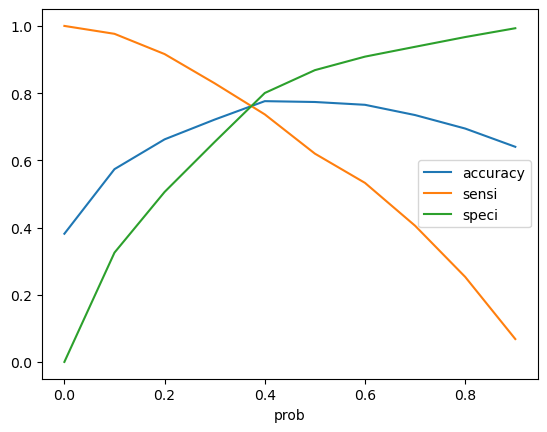

In [100]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

<h4 style = "color : Green">  From the graph it is visible that the optimal cut off is at 0.35.

In [101]:
# Creating a new df for 'final_predicted'
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.109393,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.088658,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.707150,1,1,1,1,1,1,1,1,1,0,0,1
3,1,0.802095,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.699469,1,1,1,1,1,1,1,1,0,0,0,1


In [102]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7609825224374114

In [103]:
# Creating confusion matrix 
# Creating a confusion matrix - 2 with final.converted and the final_predicted 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2953,  975],
       [ 543, 1880]], dtype=int64)

In [104]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [105]:
# Calculating the sensitivity
TP/(TP+FN)

0.7758976475443665

In [106]:
# Calculating the specificity
TN/(TN+FP)

0.7517820773930753

<font color= green>___With the current cut off as 0.35 we have accuracy, sensitivity and specificity of around 76%.___</font>

## 8. Prediction on Test set

In [107]:
# Scaling the numerical values on the test set
scale_vars = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Lead Source', 'Lead Origin', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Tags', 'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Last Notable Activity']


leads_test[scale_vars] = Scaler.fit_transform(leads_test[scale_vars])
leads_test.describe()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,2723.000000,2723.000000,2723.000000,2723.0,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.0,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.0,2723.000000,2723.000000,2723.0,2723.0,2723.000000,2723.000000,2723.000000,2723.0,2723.000000,2723.000000
mean,0.225364,0.170666,0.078957,0.0,0.371649,0.025228,0.210032,0.043538,7.790672,0.499588,0.629269,0.887298,0.736443,0.311605,0.002203,0.0,0.000734,0.000367,0.000367,0.000367,0.001836,0.0,0.671841,0.730591,0.0,0.0,0.552516,0.204113,0.706757,0.0,0.328314,0.521342
std,0.198607,0.161553,0.269721,0.0,0.483334,0.036809,0.240562,0.041409,3.667914,0.294414,0.343237,0.242955,0.115654,0.463135,0.046898,0.0,0.027096,0.019164,0.019164,0.019164,0.042820,0.0,0.315723,0.325886,0.0,0.0,0.122527,0.233834,0.325612,0.0,0.469686,0.244256
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.0,0.000000,0.007092,0.007923,0.018182,5.000000,0.324324,0.388889,1.000000,0.666667,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.538462,0.400000,0.0,0.0,0.500000,0.000000,0.500000,0.0,0.000000,0.230769
50%,0.333333,0.111111,0.000000,0.0,0.000000,0.021277,0.105194,0.036364,9.000000,0.324324,0.611111,1.000000,0.666667,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.730769,1.000000,0.0,0.0,0.500000,0.200000,1.000000,0.0,0.000000,0.538462
75%,0.333333,0.277778,0.000000,0.0,1.000000,0.035461,0.398768,0.059091,12.000000,0.932432,1.000000,1.000000,0.833333,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.961538,1.000000,0.0,0.0,0.500000,0.200000,1.000000,0.0,1.000000,0.846154
max,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


In [108]:
# Diving the test data into x and y 
y_test = leads_test.pop('Converted')
X_test = leads_test

In [109]:
# Substituting all the columns in the final train model ( adding back the columns that were previously filtered out by RFE)
col = X_train.columns

In [110]:
X_test = leads_test
# Ensuring that columns of X_test match the columns of the final model (X_train_rfe)
X_test = X_test[X_train_rfe.columns]
X_test_sm = sm.add_constant(X_test)

In [111]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.181891
1,0,0.053049
2,0,0.105673
3,1,0.595077
4,0,0.355566


In [112]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.181891,0
1,0,0.053049,0
2,0,0.105673,0
3,1,0.595077,1
4,0,0.355566,1
...,...,...,...
2718,0,0.641543,1
2719,0,0.538609,1
2720,0,0.660959,1
2721,0,0.051737,0


In [113]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7576202717590892

In [114]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1247,  464],
       [ 196,  816]], dtype=int64)

In [115]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [116]:
# Calculating the sensitivity
TP/(TP+FN)

0.8063241106719368

In [117]:
# Calculating the specificity
TN/(TN+FP)

0.7288135593220338

<font color= green>___With the cutoff at 0.35, we hae the accuracy at 75%, sensitivity at 80% and specificity at 72%___</font>

## Precision Recall

In [118]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3411,  517],
       [ 921, 1502]], dtype=int64)

In [119]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7439326399207529

In [120]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6198926950061907

<font color= green>___With the cut off at 0.35%, the Precision is at 75% and Recall is at 62%___</font>

## Precision and recall Tradeoff

In [121]:
from sklearn.metrics import precision_recall_curve

In [122]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6346    1
 6347    0
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       1
 3       1
 4       1
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [123]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

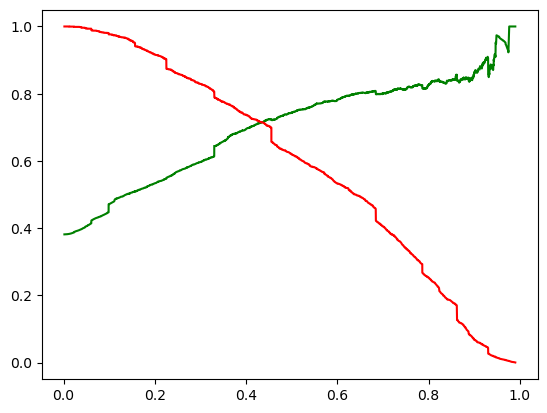

In [124]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [125]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.109393,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.088658,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.707150,1,1,1,1,1,1,1,1,1,0,0,1
3,1,0.802095,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.699469,1,1,1,1,1,1,1,1,0,0,0,1


In [126]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7779877184695324

In [127]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3177,  751],
       [ 659, 1764]], dtype=int64)

In [128]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [129]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7013916500994036

In [130]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7280231118448205

<font color= green>___With the current cutoff at 0.41, the Accuracy is at 78%, Precision is at 70% and Recall is at 72%___</font>

## Prediction on Test set

In [131]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.181891
1,0,0.053049
2,0,0.105673
3,1,0.595077
4,0,0.355566


In [132]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.181891,0
1,0,0.053049,0
2,0,0.105673,0
3,1,0.595077,1
4,0,0.355566,0
...,...,...,...
2718,0,0.641543,1
2719,0,0.538609,1
2720,0,0.660959,1
2721,0,0.051737,0


In [133]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7763496143958869

In [134]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1340,  371],
       [ 238,  774]], dtype=int64)

In [135]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [136]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.6759825327510917

In [137]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7648221343873518

<font color= green>___With the cut off at 0.41, the Accuracy stands at 78%, Precision at 67% and Recall at 76%___<font color>

In [138]:
model = LogisticRegression()
model.fit(X_train, y_train)

# Get the coefficients
coefficients = model.coef_[0]
feature_importance = pd.DataFrame({'feature': X_train.columns, 'importance': coefficients})

# Sort by absolute importance
feature_importance['abs_importance'] = feature_importance['importance'].abs()
feature_importance = feature_importance.sort_values(by='abs_importance', ascending=False)
print(feature_importance)

                                          feature  importance  abs_importance
5                     Total Time Spent on Website    4.374200        4.374200
11                What is your current occupation    3.201829        3.201829
22                                   Lead Quality   -3.191956        3.191956
21                                           Tags    2.573936        2.573936
1                                     Lead Source    2.396875        2.396875
6                            Page Views Per Visit   -2.109061        2.109061
12  What matters most to you in choosing a course   -1.660608        1.660608
0                                     Lead Origin    1.523987        1.523987
2                                    Do Not Email   -1.383406        1.383406
8                                         Country    1.348959        1.348959
25                                   Lead Profile    1.263985        1.263985
4                                     TotalVisits    0.739957   